## Astropy

Many of the SunPy classes are built on Astropy modules and tools. Some of these are useful in many usecases, especially for solar physicists.

#### 1. Importing FITS files

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')
fits.info(image_file)

Filename: /home/matthias/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [2]:
image_data = fits.getdata(image_file, ext=0)
image_data.shape

(893, 891)

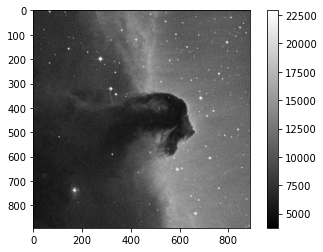

In [3]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

In [4]:
image_header = fits.getheader(image_file)
image_header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

#### 2. Keeping track of units

In [5]:
m = 200  # in g
d = .25  # in Mm
t = 3  # in min

# calculate some force in N
def F1(mass, distance, time):
    return mass * distance / time**2  # in g*Mm/min**2

f = F1(m, d, t)
print(f)

5.555555555555555


In [6]:
import astropy.units as u

m = 200 * u.g
d = .25 * u.Mm
t = 3 * u.min

# calculate some force in N
def F1(mass, distance, time):
    res = mass * distance / time**2
    return res.to('kg*m/s**2')

f = F1(m, d, t)
f

<Quantity 1.54320988 kg m / s2>

In [7]:
f.to('g*cm/s**2')

<Quantity 154320.98765432 cm g / s2>

In [8]:
f.unit

Unit("kg m / s2")

In [9]:
f.value

1.5432098765432098

#### 3. Managing coordinates

In [10]:
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic
from sunpy.coordinates import frames
import astropy.units as u

c = SkyCoord(10, 20, unit='deg')  # defaults to ICRS
c

<SkyCoord (ICRS): (ra, dec) in deg
    (10., 20.)>

In [11]:
c = SkyCoord(-25, 0, 0, frame='heliocentric', unit='deg', 
             observer='earth', obstime='2013-05-01')
c

<SkyCoord (Heliocentric: obstime=2013-05-01T00:00:00.000, observer=<HeliographicStonyhurst Coordinate for 'earth'>): (x, y, z) in deg
    (-25., 0., 0.)>

In [12]:
c.heliographic_carrington

<SkyCoord (HeliographicCarrington: obstime=2013-05-01T00:00:00.000): (lon, lat, radius) in deg
    (95.29092852, 0., 25.)>

## Sunpy

[Sunpy](https://docs.sunpy.org/en/stable/guide/tour.html#working-with-times) offers an environment for analyzing solar data. It is meant as a core-functionality tool and offers many conveniences regarding data management.

In [13]:
import sunpy.data.sample

#### 1. Maps

Maps are the primary data type in SunPy. They are in principle a numpy-array, but have meta-data (most notably a coordinate system) attached to them.

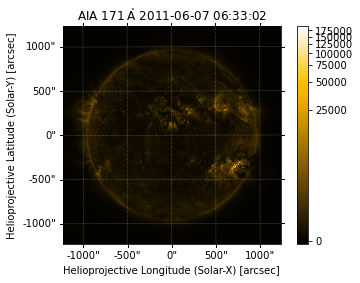

In [14]:
%matplotlib inline

import sunpy.map

aia = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)
aia.peek()

In [15]:
import sunpy
import sunpy.map
import sunpy.data.sample

my_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

In [16]:
from sunpy.map import header_helper

header_helper.meta_keywords()

{'cunit1': 'Units of the coordinate increments along naxis1 e.g. arcsec **required',
 'cunit2': 'Units of the coordinate increments along naxis2 e.g. arcsec **required',
 'crval1': 'Coordinate value at reference point on naxis1 **required',
 'crval2': 'Coordinate value at reference point on naxis2 **required',
 'cdelt1': 'Spatial scale of pixels for naxis1, i.e. coordinate increment at reference point',
 'cdelt2': 'Spatial scale of pixels for naxis2, i.e. coordinate increment at reference point',
 'crpix1': 'Pixel coordinate at reference point naxis1',
 'crpix2': 'Pixel coordinate at reference point naxis2',
 'ctype1': 'Coordinate type projection along naxis1 of data e.g. HPLT-TAN',
 'ctype2': 'Coordinate type projection along naxis2 of data e.g. HPLN-TAN',
 'hgln_obs': 'Heliographic longitude of observation',
 'hglt_obs': 'Heliographic latitude of observation',
 'dsun_obs': 'distance to Sun from observation in metres',
 'rsun_obs': 'radius of Sun in meters from observation',
 'date-ob

In [17]:
import numpy as np
import astropy.units as u
from sunpy.coordinates import frames
from astropy.coordinates import SkyCoord


data = np.random.rand(10, 10)
coord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime='2013-10-28', 
                 observer='earth', frame=frames.Helioprojective)

header = sunpy.map.header_helper.make_fitswcs_header(data, coord)

for key, value in header.items():
    print('%s: %s' % (key, value))

wcsaxes: 2
crpix1: 5.5
crpix2: 5.5
cdelt1: 1.0
cdelt2: 1.0
cunit1: arcsec
cunit2: arcsec
ctype1: HPLN-TAN
ctype2: HPLT-TAN
crval1: 0.0
crval2: 0.0
lonpole: 180.0
latpole: 0.0
dateref: 1858-11-17
mjdrefi: 0.0
mjdreff: 0.0
date-obs: 2013-10-28T00:00:00.000
hgln_obs: 0.0
hglt_obs: 4.7711570596394
dsun_obs: 148644585949.49176
rsun_ref: 695700000.0
rsun_obs: 965.3723815059902


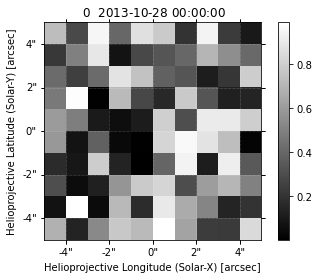

In [18]:
my_map = sunpy.map.Map(data, header)
my_map.peek()

In [19]:
my_map

SunPy Map
---------
Observatory:		 
Instrument:		 
Detector:		 
Measurement:		 0.0
Wavelength:		 0.0
Observation Date:	 2013-10-28 00:00:00
Exposure Time:		 0.000000 s
Dimension:		 [10. 10.] pix
Coordinate System:	 helioprojective
Scale:			 [1. 1.] arcsec / pix
Reference Pixel:	 [5.5 5.5] pix
Reference Coord:	 [0. 0.] arcsec
array([[0.68596684, 0.14133937, 0.53113733, 0.77548255, 0.71959563,
        0.98542822, 0.6369493 , 0.23699542, 0.22989714, 0.8454149 ],
       [0.07253442, 0.98813757, 0.04647181, 0.71628767, 0.17262345,
        0.90174572, 0.66216788, 0.51760255, 0.14932093, 0.19950982],
       [0.30346377, 0.04978064, 0.12946317, 0.57827381, 0.780513  ,
        0.8262049 , 0.29967367, 0.60934728, 0.70597687, 0.50056913],
       [0.17159029, 0.09324901, 0.79484492, 0.13955904, 0.00316554,
        0.39304504, 0.94424081, 0.11483232, 0.92063815, 0.34736592],
       [0.58969083, 0.079673  , 0.38071907, 0.04040364, 0.0073673 ,
        0.82338136, 0.96487296, 0.87773544, 0.73519312, 0

SunPy map data is always a numpy array. Data access is therefore equivalent to numpy array access.

In [20]:
type(my_map.data)

numpy.ndarray

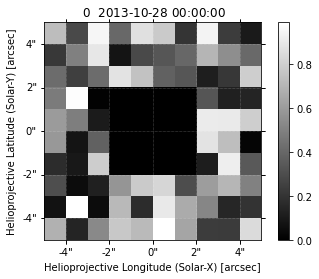

In [21]:
my_map.data[3:7, 3:7] = 0
my_map.peek()

In [22]:
#my_map.save('')

#### 2. TimeSeries

SunPy's TimeSeries class offers an organized way of handling time series data. 

/home/matthias/anaconda3/envs/pyKIS/lib/python3.7/functools.py:840: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


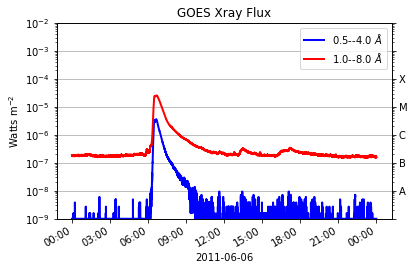

In [23]:
import numpy as np
import sunpy.data.sample
import sunpy.timeseries as ts

my_ts = ts.TimeSeries(sunpy.data.sample.GOES_XRS_TIMESERIES, source='XRS')
my_ts.peek()

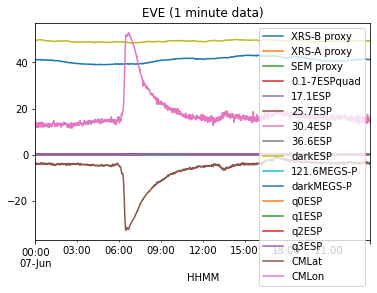

In [24]:
import numpy as np
import sunpy.data.sample
import sunpy.timeseries as ts

my_ts = ts.TimeSeries(sunpy.data.sample.EVE_TIMESERIES, source='EVE')
my_ts.peek()

In [25]:
import numpy as np
import pandas as pd
import datetime as dt
import sunpy.timeseries as ts

intensity = np.sin(np.arange(0, 12 * np.pi, ((12 * np.pi) / (24*60))))

base = dt.datetime.today()
times = [base - dt.timedelta(minutes=x) for x in range(24*60, 0, -1)]

data = pd.DataFrame(intensity, index=times, columns=['intensity'])
data

,intensity
2020-06-15 14:54:42.808702,0.000000
2020-06-15 14:55:42.808702,0.026177
2020-06-15 14:56:42.808702,0.052336
2020-06-15 14:57:42.808702,0.078459
2020-06-15 14:58:42.808702,0.104528
...,...
2020-06-16 14:49:42.808702,-0.130526
2020-06-16 14:50:42.808702,-0.104528
2020-06-16 14:51:42.808702,-0.078459
2020-06-16 14:52:42.808702,-0.052336


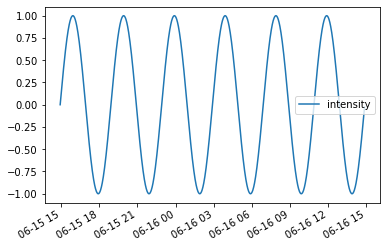

In [26]:
my_ts = ts.TimeSeries(data)
my_ts.peek()

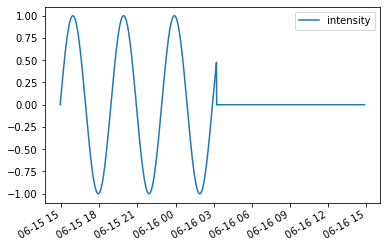

In [27]:
my_ts.data[740:] = 0
my_ts.peek()

In [28]:
my_ts.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1440 entries, 2020-06-15 14:54:42.808702 to 2020-06-16 14:53:42.808702
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   intensity  1440 non-null   float64
dtypes: float64(1)
memory usage: 22.5 KB


Sunpy time series data is always a pandas data frame. Data access is therefore equivalent to pandas data frame access.

In [29]:
type(my_ts.data)

pandas.core.frame.DataFrame

In [30]:
my_ts.data['intensity'][90:95]

2020-06-15 16:24:42.808702    0.707107
2020-06-15 16:25:42.808702    0.688355
2020-06-15 16:26:42.808702    0.669131
2020-06-15 16:27:42.808702    0.649448
2020-06-15 16:28:42.808702    0.629320
Name: intensity, dtype: float64

In [31]:
my_ts.data.iloc[90:95]

,intensity
2020-06-15 16:24:42.808702,0.707107
2020-06-15 16:25:42.808702,0.688355
2020-06-15 16:26:42.808702,0.669131
2020-06-15 16:27:42.808702,0.649448
2020-06-15 16:28:42.808702,0.629320


In [32]:
from sunpy.util.metadata import MetaDict
from collections import OrderedDict
import astropy.units as u

meta = MetaDict({'key':'value'})
units = OrderedDict([('intensity', u.W/u.m**2)])
my_ts = ts.TimeSeries(data, meta, units)
my_ts.meta

|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2020-06-15 14:54:42.808702 | intensity       | key: value                                        |
|            to             |                 |                                                   |
|2020-06-16 14:53:42.808702 |                 |                                                   |
|-------------------------------------------------------------------------------------------------|

#### 3. Plotting

Of course for every SunPy class, plotting can be done in an ordinary fashion by accessing the data directly. However, the SunPy-`plot` method is a powerful tool in visualization.

In [33]:
import sunpy.data.sample
import sunpy.map

aia = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)
aia

SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 3
Detector:		 AIA
Measurement:		 171.0 Angstrom
Wavelength:		 171.0 Angstrom
Observation Date:	 2011-06-07 06:33:02
Exposure Time:		 0.234256 s
Dimension:		 [1024. 1024.] pix
Coordinate System:	 helioprojective
Scale:			 [2.402792 2.402792] arcsec / pix
Reference Pixel:	 [512.5 512.5] pix
Reference Coord:	 [3.22309951 1.38578135] arcsec
array([[ -95.92475  ,    7.076416 ,   -1.9656711, ..., -127.96519  ,
        -127.96519  , -127.96519  ],
       [ -96.97533  ,   -5.1167884,    0.       , ...,  -98.924576 ,
        -104.04137  , -127.919716 ],
       [ -93.99607  ,    1.0189276,   -4.0757103, ...,   -5.094638 ,
         -37.95505  , -127.87541  ],
       ...,
       [-128.01454  , -128.01454  , -128.01454  , ..., -128.01454  ,
        -128.01454  , -128.01454  ],
       [-127.899666 , -127.899666 , -127.899666 , ..., -127.899666 ,
        -127.899666 , -127.899666 ],
       [-128.03072  , -128.03072  , -128.03072  , ..., -128.03

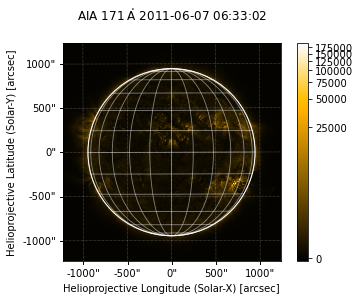

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(1)

ax = aia.plot()
limb = aia.draw_limb()
grid = aia.draw_grid()
clb = plt.colorbar()

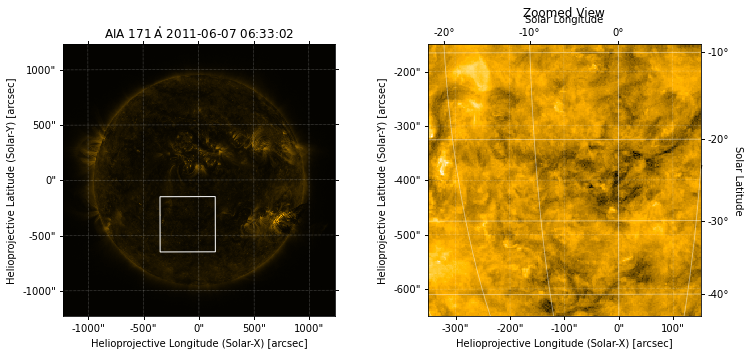

In [35]:
"""
Draw a rectangle in plot 1 and plot the according regions of interest 
in plot 2.
"""

import matplotlib.pyplot as plt
from matplotlib import patches
import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
import sunpy.data.sample


# Define a regions
length = 250 * u.arcsec
x0 = -100 * u.arcsec
y0 = -400 * u.arcsec

# Create a SunPy Map, and a second submap over the region of interest
smap = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)
bottom_left = SkyCoord(x0 - length, y0 - length, 
                      frame=smap.coordinate_frame)
top_right = SkyCoord(x0 + length, y0 + length, 
                    frame=smap.coordinate_frame)
submap = smap.submap(bottom_left, top_right)

# Create a figure
fig = plt.figure(figsize=(12, 5))

# Add axis plus plot, using the WCS from smap
ax1 = fig.add_subplot(1, 2, 1, projection=smap)
img1 = smap.plot()

# Draw box on the image
rct = smap.draw_rectangle(bottom_left, length * 2, length * 2)

# Create second axis, add plot
ax2 = fig.add_subplot(1, 2, 2, projection=submap)
img2 = submap.plot()

# Add overlay grid
grd = submap.draw_grid(grid_spacing=10*u.deg)

# Change title
ttl = ax2.set_title('Zoomed View')

#### 4. Working with Times

SunPy also contains a number of convenience functions for working with dates and times. 

In [36]:
import sunpy.time as st

st.parse_time('2004/02/05 12:00')

<Time object: scale='utc' format='isot' value=2004-02-05T12:00:00.000>

In [37]:
st.parse_time('2004-Feb-05 12:00')

<Time object: scale='utc' format='isot' value=2004-02-05T12:00:00.000>

In [38]:
st.parse_time((2004, 2, 5))

<Time object: scale='utc' format='isot' value=2004-02-05T00:00:00.000>

In [39]:
t = st.parse_time('2004.02.05_12:00:00_TAI')

In [40]:
t.datetime64, t.fits, t.to_datetime()

(numpy.datetime64('2004-02-05T12:00:00.000000000'),
 '2004-02-05T12:00:00.000',
 datetime.datetime(2004, 2, 5, 12, 0))

In [41]:
import numpy as np
import pandas as pd
import datetime as dt
import sunpy.time as st
import sunpy.timeseries as ts

intensity = np.sin(np.arange(0, 12 * np.pi, ((12 * np.pi) / (24*60))))

base = dt.datetime.today()
base = st.parse_time(base)
#times = [base - datetime.timedelta(minutes=x) for x in range(24*60, 0, -1)]
times = np.arange(base.datetime64, (base + 1).datetime64, 
                  dtype='datetime64[m]')

data = pd.DataFrame(intensity, index=times, columns=['intensity'])
data

,intensity
2020-06-16 14:54:00,0.000000
2020-06-16 14:55:00,0.026177
2020-06-16 14:56:00,0.052336
2020-06-16 14:57:00,0.078459
2020-06-16 14:58:00,0.104528
...,...
2020-06-17 14:49:00,-0.130526
2020-06-17 14:50:00,-0.104528
2020-06-17 14:51:00,-0.078459
2020-06-17 14:52:00,-0.052336


In [42]:
time_range = st.TimeRange('2004-Feb-05 12:00', '2004-Feb-05 20:00')
time_range

    Start: 2004-02-05 12:00:00
    End:   2004-02-05 20:00:00
    Center:2004-02-05 16:00:00
    Duration:0.33333333333333337 days or
           8.0 hours or
           480.00000000000006 minutes or
           28800.000000000004 seconds

In [43]:
time_range = st.TimeRange('2004-Feb-05 12:00', 8*u.h)
time_range

    Start: 2004-02-05 12:00:00
    End:   2004-02-05 20:00:00
    Center:2004-02-05 16:00:00
    Duration:0.33333333333333337 days or
           8.0 hours or
           480.00000000000006 minutes or
           28800.000000000004 seconds

In [44]:
time_range.center, time_range.minutes, time_range.days, time_range.seconds

(<Time object: scale='utc' format='isot' value=2004-02-05T16:00:00.000>,
 <Quantity 480. min>,
 <Quantity 0.33333333 d>,
 <Quantity 28800. s>)

In [45]:
for h in range(3):
    print(time_range.next())

    Start: 2004-02-05 20:00:00
    End:   2004-02-06 04:00:00
    Center:2004-02-06 00:00:00
    Duration:0.33333333333333337 days or
           8.0 hours or
           480.00000000000006 minutes or
           28800.000000000004 seconds

    Start: 2004-02-06 04:00:00
    End:   2004-02-06 12:00:00
    Center:2004-02-06 08:00:00
    Duration:0.33333333333333337 days or
           8.0 hours or
           480.00000000000006 minutes or
           28800.000000000004 seconds

    Start: 2004-02-06 12:00:00
    End:   2004-02-06 20:00:00
    Center:2004-02-06 16:00:00
    Duration:0.33333333333333337 days or
           8.0 hours or
           480.00000000000006 minutes or
           28800.000000000004 seconds

